### 数据归一化

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.0.0
sys.version_info(major=3, minor=7, micro=4, releaselevel='final', serial=0)
matplotlib 3.1.1
numpy 1.17.3
sklearn 0.21.3
tensorflow 2.0.0
tensorflow_core.keras 2.2.4-tf


In [14]:
# 导入数据 加州房产数据
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data)
print(housing.target)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [12]:
housing.data

AttributeError: module 'tensorflow_core.keras.datasets.boston_housing' has no attribute 'data'

In [ ]:
from sklearn.model_selectiondel import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split( housing.data, housing.target, random_state = 7)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_all, y_train_all, random_state=11)

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

In [3]:
# 数据归一化  x = (x - u) / std   u-均值  std-方差  满足 0 1 正态分布
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
# x_train: [None,28, 28] -> [None, 784]
x_train_scalar = scalar.fit_transform(x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_vaild_scalar = scalar.fit_transform(x_vaild.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_test_scalar = scalar.fit_transform(x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)

In [6]:
# tf.keras 模型
model = tf.keras.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

# relu: y = max(0, x)
# softmax: 将项量变成改了分布 x = [x1, x2, x3]
# y = [e^x1/sum, e^x2/sum, e^x3/sum], sum = e^x1 + e^x2 + e^x3

model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
history = model.fit(x_train_scalar, y_train, epochs=10,
         validation_data=(x_vaild_scalar, y_vaild))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 4s 77us/sample - loss: 0.5417 - accuracy: 0.8062 - val_loss: 0.4162 - val_accuracy: 0.8568
Epoch 2/10
55000/55000 [==============================] - 4s 69us/sample - loss: 0.3934 - accuracy: 0.8577 - val_loss: 0.3747 - val_accuracy: 0.8668
Epoch 3/10
55000/55000 [==============================] - 4s 71us/sample - loss: 0.3553 - accuracy: 0.8715 - val_loss: 0.3631 - val_accuracy: 0.8716
Epoch 4/10
55000/55000 [==============================] - 4s 68us/sample - loss: 0.3306 - accuracy: 0.8803 - val_loss: 0.3409 - val_accuracy: 0.8814
Epoch 5/10
55000/55000 [==============================] - 4s 68us/sample - loss: 0.3104 - accuracy: 0.8864 - val_loss: 0.3333 - val_accuracy: 0.8774
Epoch 6/10
55000/55000 [==============================] - 4s 68us/sample - loss: 0.2944 - accuracy: 0.8928 - val_loss: 0.3268 - val_accuracy: 0.8800
Epoch 7/10
55000/55000 [==============================] -

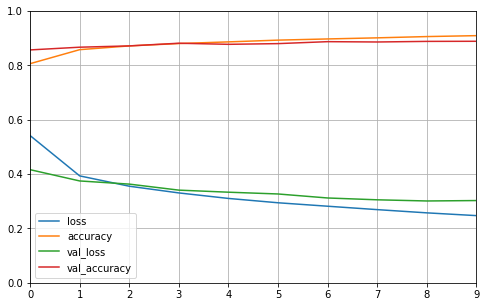

In [9]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)

    
    
plot_learning_curves(history)

In [10]:
model.evaluate(x_test_scalar, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.3362989846944809, 0.8802]